In [11]:
from pydbgen import pydbgen
myDB=pydbgen.pydb()



In [23]:
df1 = myDB.gen_dataframe(1000,['name', 'email', 'city', 'state', 'country', 'phone','date'])
df2 = myDB.gen_dataframe(1000,['email', 'company', 'city'])

In [24]:
df1.merge(df2, on='city')

,name,email_x,city,state,country,phone-number,date,email_y,company
0,Heidi Duncan,Heidi_D@zoho.com,Lloyd,Washington,Anguilla,162-435-5848,1983-06-24,blackchristopher@best-mejia.info,Saunders-Baker
1,Wendy Jones,Jones.Wendy@gmail.com,Brecon,Indiana,Gabon,983-662-6431,1988-01-18,karencollins@yahoo.com,"Spencer, Willis and Grimes"
2,Michelle Wilson,Michelle.W23@yandex.com,Muse,Florida,Australia,679-819-2640,1985-02-07,novakjohnny@duncan.net,Santos-Castillo
3,Cheryl Lang,Cheryl.Lang43@comcast.net,Ryan,California,Montenegro,229-446-7558,1971-09-23,stewartemily@cox.org,Kelly-Williams
4,Amy Turner,Amy.T@mail.com,Gerald,West Virginia,Thailand,357-801-7159,1994-08-25,thomasreynolds@randolph.com,Edwards Ltd
5,James Thomas,James_T@gmail.com,Cadott,Montana,Cambodia,516-705-7906,2016-09-03,ninasmith@rose.com,Bender and Sons
6,Christine Rodriguez,Christine.R@xfinity.com,Zag,Vermont,Tonga,873-150-1121,1979-06-07,sheltoncarrie@yahoo.com,"Moore, Meza and Chapman"
7,Darlene Caldwell,DarleneCaldwell@zoho.com,Warm Springs,Wisconsin,Norway,568-259-0285,1991-03-30,skinnerjoseph@wilkinson-jackson.com,Beasley Ltd
8,Jon Brown,Jon_B14@gmail.com,Manannah,Florida,Cayman Islands,795-364-4063,1995-05-12,heathercoffey@hotmail.com,Clements-Garrett
9,Lauren Cox,LaurenCox22@zoho.com,Ariton,Idaho,Swaziland,599-008-8342,1983-01-08,tlarson@white.com,Moore-Simpson


# Generator Outline

## Goals:

1. Be more realistic than arrays of ints
    a. Include string, categorical and boolean columns
    b. Optional: Specify column cardinalities, ranges
2. Operations should reflect core nature of operation
    1. join on common feilds
    2. group by / filter on categorical column or set of columns with multiple values
    3. aggregate numbers not categorical values
    4. Generate new columns only on numerical ones.
3. Start with multiple data sources
    a. should have common columns for join
4. do not extend branches too far that you end up with empty dataframes (most operations reduce rows/columns than add)
5. Use a library to generate values for specific column types (Python Faker: https://github.com/joke2k/faker)


## Types of columns:

1. PK/Unique
    a. Numeric (AutoNumbered Index)
    b. String (Name/Email/username)
    c. Phone Number
    d. License Plate
    e. SSN
2. Categorical
    a. address
    b. city
    d. state
    e. country
    f. Job Title
    g. Company Name
    h. Day of Week
    i. Month
3. Integer Range
4. Float Range
5. Boolean Column

## Generation Parameters

1. Number of base tables (More than one should ensure atleast one downstream join operation)
2. Width of base tables (as well as spread of columns of each type: (PK, Categorical, Integer, Float, Bool)
3. number of rows for each base table


## Per Operation Rules

1. Filter only by Categorical or by Ranges
2. GroupBy Categories, Aggregate on Ranges
3. Join on Unique Values (focus on equi/natural join)
    a. Join on same branch only if there is a column augmentation.
4. 


## Column Types

category index	
join candidate	1
groupable	2
numeric aggregation	3
splittable string	4


In [2]:
import faker
fake = faker.Faker()

In [22]:
# Checking value cardinalities
len(set(fake.name() for _ in range(200000)))


120271

In [64]:
column_dict = [
    {
        'col_name': 'Full Name',
        'faker_name': 'name',
        'type': 'unique',
        'dtype': 'string',
        'maxcardinality': 100000,
    },
    {
        'col_name': 'Barcode',
        'faker_name': 'ean13',
        'type': 'unique',
        'dtype': 'int',
        'maxcardinality': 10**13,
    },
    {
        'col_name': 'Plate Number',
        'faker_name': 'license_plate',
        'type': 'unique',
        'dtype': 'int',
        'maxcardinality': 10**13,
    },
    {
        'col_name': 'Country',
        'faker_name': 'country',
    },
    {
        'col_name': 'Street Address',
        'faker_name': 'street_address',
    },
    {
        'col_name': 'City',
        'faker_name': 'city',
    },
    {
        'col_name': 'Zipcode',
        'faker_name': 'zipcode',
    },
    {
        'col_name': 'Latitude',
        'faker_name': 'latitude',
    },
    {
        'col_name': 'Longitude',
        'faker_name': 'longitude',
    },
    {
        'col_name': 'Month',
        'faker_name': 'month_name',
    },
    {
        'col_name': 'Weekday',
        'faker_name': 'day_of_week',
    },
    {
        'col_name': 'Time',
        'faker_name': 'time',
    },
    {
        'col_name': 'Date',
        'faker_name': 'date',
    },
    {
        'col_name': 'SSN',
        'faker_name': 'ssn',
    },
    {
        'col_name': 'Email',
        'faker_name': 'email',
    },
    {
        'col_name': 'Office Email',
        'faker_name': 'company_email',
    },
    {
        'col_name': 'Company',
        'faker_name': 'company',
    },
    {
        'col_name': 'Job',
        'faker_name': 'job',
    },
    {
        'col_name': 'Phone Number',
        'faker_name': 'phone_number',
    }  
    
]

In [65]:
for col in [col['faker_name'] for col in column_dict]:
    print(fake.format(col))


Michael Nelson
5087498606650
218 KYE
Lao People's Democratic Republic
1938 Cynthia Passage
Pamelamouth
50151
54.9055435
166.148616
July
Monday
10:46:14
1991-12-24
208-75-4996
fgordon@ortiz.com
stevenreid@moreno.com
Ortiz, Heath and Henderson
Research scientist (physical sciences)
457.339.2857x4000


In [66]:
import pandas as pd
num = 100

headings = []
series = []
for col in column_dict:
    headings.append(col['col_name'])
    series.append(pd.Series((fake.format(col['faker_name']) for _ in range(num))))
    
df = pd.concat(series, axis=1, keys=headings)
df

,Full Name,Barcode,Plate Number,Country,Street Address,City,Zipcode,Latitude,Longitude,Month,Weekday,Time,Date,SSN,Email,Office Email,Company,Job,Phone Number
0,Daniel Torres,5319522592715,83US9,Western Sahara,96394 Garcia Island,New Johnfort,86438,20.0325725,-132.990863,May,Monday,05:58:07,2015-04-09,235-28-0421,susanlynch@dawson-lane.com,eharris@mcclure-coleman.com,Booth Inc,Film/video editor,001-695-775-8657x7828
1,Nancy Rodriguez,4171804620773,3GM28,Uganda,1333 Jeremy Union,Robbinsland,65227,73.535459,-136.432734,May,Friday,21:39:40,1981-02-26,580-31-7080,cynthiaelliott@sullivan-cook.info,martinrebecca@mcknight.net,Morgan-Wilson,Systems analyst,+1-242-106-7799x5155
2,Tyler Dean,0979518666094,BJL-0538,Chad,70995 Mccoy Rest Apt. 235,Parkershire,58541,15.6538425,-107.979768,December,Thursday,08:22:57,2000-03-31,732-38-2321,cervantesdavid@white.com,chad58@chung-lewis.org,Campos PLC,Teaching laboratory technician,+1-879-351-6620x596
3,Denise Baker,1524439320632,401-620,Hong Kong,85846 Christensen Station,New Brianview,56748,77.3112845,-90.213367,February,Wednesday,12:06:14,1977-05-20,675-51-6900,ldiaz@ramsey.net,connor51@roberts-jennings.com,Smith-Cox,Catering manager,(694)974-4766x08604
4,Heather Thomas,5103468848223,YZJ 992,Jordan,83217 Cooper Place,Virginiamouth,15422,9.756563,-128.169621,July,Tuesday,12:30:26,1982-04-24,442-80-6488,vanessaporter@dixon.com,thomas35@haley.com,Glover-Johnson,Air cabin crew,001-583-006-2838
5,Shane Scott,6254471790982,LKJ 559,Mongolia,17586 John Mills,East Jeffrey,55280,-71.013653,144.540777,March,Sunday,14:03:51,2010-10-09,245-34-1488,davidwatkins@yahoo.com,amy36@vaughan.com,"Reynolds, Gillespie and Morales",Dispensing optician,(649)592-8500x424
6,John Cox,1174146447957,344 VAO,Cayman Islands,0438 Kelly Ports Apt. 353,Markfort,64144,37.7131215,124.664050,July,Friday,23:33:32,1988-03-31,102-09-3244,timothywood@shelton.biz,darren07@bennett-lambert.com,Gonzalez-Lee,Scientific laboratory technician,+1-465-408-6770x86041
7,Paige Smith,5362489460252,030-163,Malaysia,6436 Padilla Loop,Andrewside,36518,39.9357065,159.915367,April,Friday,12:03:20,1973-11-30,633-67-9311,ocampbell@hotmail.com,eringrant@miller.net,"Boyer, Stewart and Turner",Solicitor,(863)642-4759
8,Jacqueline Fischer,5213766674346,99QX8,Madagascar,862 Brown Landing,East Russellchester,51607,-33.6489815,-20.345239,September,Monday,21:07:36,2001-01-25,855-23-0158,fuentesashley@hotmail.com,nicholasbailey@glass.com,Lowery Ltd,Broadcast journalist,(421)349-4607
9,Lori Anderson,5493303711783,TU 1826,Senegal,468 Chad Lakes Apt. 423,East James,79075,56.4099335,162.360204,March,Thursday,13:36:51,2013-11-26,549-76-7734,taylorpeter@yahoo.com,richardparker@coffey.com,Lewis-Wells,"Engineer, drilling",(290)541-7828x931


In [23]:
non_providers = [
    'add_provider',
    'format',
    'get_formatter',
    'parse',
    'provider',
    'set_provider',
    'set_formatter'
]

faker_cols = [method_name for method_name in dir(fake)
                  if callable(getattr(fake, method_name)) 
                  and not method_name.startswith('_')
                  and method_name not in non_providers]

In [123]:
len(faker_cols)

215

In [121]:
import pandas as pd
num = 1

headings = []
series = []
for col in faker_cols:
    headings.append(col)
    series.append(pd.Series((fake.format(col) for _ in range(num))))
    
df = pd.concat(series, axis=1, keys=headings)
df.iloc[0]

address
am_pm
ascii_company_email
ascii_email
ascii_free_email
ascii_safe_email
bank_country
bban
binary
boolean
bothify
bs
building_number
catch_phrase
century
chrome
city
city_prefix
city_suffix
color_name
company
company_email
company_suffix
coordinate
country
country_code
credit_card_expire
credit_card_full
credit_card_number
credit_card_provider
credit_card_security_code
cryptocurrency
cryptocurrency_code
cryptocurrency_name
currency
currency_code
currency_name
date
date_between
date_between_dates
date_object
date_of_birth
date_this_century
date_this_decade
date_this_month
date_this_year
date_time
date_time_ad
date_time_between
date_time_between_dates
date_time_this_century
date_time_this_decade
date_time_this_month
date_time_this_year
day_of_month
day_of_week
domain_name
domain_word
ean
ean13
ean8
ein
email
file_extension
file_name
file_path
firefox
first_name
first_name_female
first_name_male
free_email
free_email_domain
future_date
future_datetime
get_providers
hex_color
hexify

address                   9353 Floyd Lights Suite 823\nJohnborough, MD 9...
am_pm                                                                    PM
ascii_company_email                                    bartlettdale@le.info
ascii_email                                sweeneysteven@pierce-harris.info
ascii_free_email                                         marylove@gmail.com
ascii_safe_email                                      patrick81@example.net
bank_country                                                             GB
bban                                                      VVUH7892302198180
binary                    b'W#\xb3sc.\x93\xe0\x01\x06\x93G\x81D\xa8\xea\...
boolean                                                                True
bothify                                                               24 ja
bs                                                   seize wireless systems
building_number                                                       26380
catch_phrase

In [12]:
import numpy as np
import pandas as pd
from faker import Faker

def generate_base_df(num_cols=5, num_rows=10, atleast_one_pk=False, 
                     repeat_cols=False, seed=None, index_col=None,
                     join_cols=None):
    #TODO: Atleast One PK
    #TODO: Cardinality Enforcement
    #TODO: Seed Selection
    #TODO: Index Column
    #TODO: Join Columns
    
    non_providers = [
    'add_provider',
    'format',
    'get_formatter',
    'parse',
    'provider',
    'set_provider',
    'set_formatter'
    ]
    fake = Faker()
    faker_cols = [method_name for method_name in dir(fake)
                      if callable(getattr(fake, method_name)) 
                      and not method_name.startswith('_')
                      and method_name not in non_providers]
    
    
    selected_cols = np.random.choice(faker_cols, num_cols, replace=repeat_cols)
    
    headings = []
    series = []
    for col in selected_cols:
        headings.append(col)
        series.append(pd.Series((fake.format(col) for _ in range(num_rows))))

    return pd.concat(series, axis=1, keys=headings)


In [446]:
generate_base_df(num_cols=10, num_rows=1000)

,random_lowercase_letter,ascii_company_email,random_element,seed_instance,timezone,credit_card_full,rgb_css_color,cryptocurrency_name,phone_number,building_number
0,f,amyhughes@smith.com,a,<faker.generator.Generator object at 0x7efc3c0...,America/Costa_Rica,VISA 19 digit\nAlbert Whitaker\n48727767070460...,"rgb(11,206,104)",Zclassic,362-468-3357x272,11874
1,e,walkertracy@escobar.biz,a,<faker.generator.Generator object at 0x7efc3c0...,Europe/Vaduz,JCB 16 digit\nAmanda Davis\n3566653268672876 0...,"rgb(191,72,116)",Omni,+1-737-840-2613x39918,22255
2,q,joseph81@edwards.com,c,<faker.generator.Generator object at 0x7efc3c0...,Pacific/Funafuti,JCB 16 digit\nStacey Knapp\n3553976950440913 1...,"rgb(230,132,161)",Feathercoin,(122)036-5716,3948
3,a,amygreen@gutierrez.info,b,<faker.generator.Generator object at 0x7efc3c0...,Africa/Porto-Novo,Diners Club / Carte Blanche\nKimberly Mcneil\n...,"rgb(231,32,137)",Vertcoin,001-808-708-2843x40098,907
4,u,garmstrong@collins.com,b,<faker.generator.Generator object at 0x7efc3c0...,Europe/Oslo,VISA 16 digit\nJulie Stewart\n4659076930790106...,"rgb(161,217,109)",Ethereum,682.192.5026,429
5,f,erinharris@barnett.org,b,<faker.generator.Generator object at 0x7efc3c0...,Asia/Saigon,Mastercard\nRichard Cook\n2223267087940567 12/...,"rgb(148,236,164)",Burstcoin,(170)996-5994x76748,43530
6,j,tbenson@taylor.info,b,<faker.generator.Generator object at 0x7efc3c0...,Pacific/Kwajalein,JCB 16 digit\nAshley Conley\n3526655391644606 ...,"rgb(149,238,142)",Primecoin,001-265-848-5574,4670
7,c,dmarsh@smith.biz,c,<faker.generator.Generator object at 0x7efc3c0...,America/Barbados,VISA 13 digit\nLucas Fisher\n4874529860003 09/...,"rgb(89,254,10)",Tether,(063)998-0285x8443,991
8,t,keithgarcia@davis.net,b,<faker.generator.Generator object at 0x7efc3c0...,Africa/Kinshasa,Discover\nBarbara Lam\n6560699012972996 08/20\...,"rgb(92,209,172)",Gridcoin,+1-780-962-5609,814
9,z,yfritz@jackson.com,c,<faker.generator.Generator object at 0x7efc3c0...,America/Lima,Mastercard\nDenise Hamilton\n2227598545027803 ...,"rgb(186,226,168)",Bytecoin,001-547-228-6833x862,318


In [26]:
for c in faker_cols:
    print(c) 

address
am_pm
ascii_company_email
ascii_email
ascii_free_email
ascii_safe_email
bank_country
bban
binary
boolean
bothify
bs
building_number
catch_phrase
century
chrome
city
city_prefix
city_suffix
color_name
company
company_email
company_suffix
coordinate
country
country_code
credit_card_expire
credit_card_full
credit_card_number
credit_card_provider
credit_card_security_code
cryptocurrency
cryptocurrency_code
cryptocurrency_name
currency
currency_code
currency_name
date
date_between
date_between_dates
date_object
date_of_birth
date_this_century
date_this_decade
date_this_month
date_this_year
date_time
date_time_ad
date_time_between
date_time_between_dates
date_time_this_century
date_time_this_decade
date_time_this_month
date_time_this_year
day_of_month
day_of_week
domain_name
domain_word
ean
ean13
ean8
ein
email
file_extension
file_name
file_path
firefox
first_name
first_name_female
first_name_male
free_email
free_email_domain
future_date
future_datetime
get_providers
hex_color
hexify

In [407]:
fake.word()

'indeed'

In [3]:
fake.image_url()

'https://www.lorempixel.com/560/802'

In [12]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url=fake.image_url())

In [9]:
def load_function_dict(directory='./sources/'):
    return {
        'joinable': [line.rstrip('\n') for line in open(directory+'joinable_cols.txt')],
        'groupable': [line.rstrip('\n') for line in open(directory+'groupable_cols.txt')],
        'numeric': [line.rstrip('\n') for line in open(directory+'numeric_cols.txt')],
        'string': [line.rstrip('\n') for line in open(directory+'string_cols.txt')],
    }


In [182]:
import pandas as pd
import numpy as np
import sys 
import traceback
from faker import Faker
from lineage import LineageTracker

class FakerVersionGenerator:
    
    def __init__(self, shape=(8,20), out_directory='dataset/',
                 num_base_versions=1, scale=10.):
    
        self.functions = self.load_function_dict()
        self.inv_functions = self.inv_function_dict()
        
        self.fake = Faker()
        
        rowsize, colsize = shape

        self.dataset = []
        self.dataset_metadata = []
        base_df = self.generate_base_df(num_cols=colsize, num_rows=rowsize)
        self.out_directory = out_directory
        self.lineage = LineageTracker(self.out_directory)
        self.dataset.append(base_df)
        self.lineage.new_item(self.get_last_label(), base_df)
        self.scale = scale
    
    def load_function_dict(self, directory='./sources/'):
        return {
            'joinable': [line.rstrip('\n') for line in open(directory+'joinable_cols.txt')],
            'groupable': [line.rstrip('\n') for line in open(directory+'groupable_cols.txt')],
            'numeric': [line.rstrip('\n') for line in open(directory+'numeric_cols.txt')],
            'string': [line.rstrip('\n') for line in open(directory+'string_cols.txt')],
        }
    
    def inv_function_dict(self):
        return {v:k for k,vs in self.functions.items() for v in vs}
    
    def get_last_label(self):
        return str(len(self.dataset)-1)
    
    def __getitem__(self, item):
        return self.dataset[item]

    def __len__(self):
        return len(self.dataset)

    def select_new_cols(self, group, num_cols, repeat=False):
        return np.random.choice(self.functions[group], num_cols, replace=repeat).tolist()
    
    def select_rand_cols(self, df, num=1):
        return np.random.choice(df.columns.values, num)
    
    def select_rand_col_group(self, df, group, num_cols):
        col_group = [col for col in df.columns.values 
                     if col in self.inv_functions.keys() 
                     and self.inv_functions[col] == group]
        
        #TODO: Fix case where num_cols is too large for available columns
        if col_group:
            return np.random.choice(col_group, num_cols).tolist()
        else:
            raise TypeError('Cannot select '+str(num_cols)+' number of columns of type '+group)
    
    def get_row_permutation(self, df):
        return np.random.permutation(df.index.values)
    
    def select_rand_dataset(self, for_merge=False):
        
        size = len(self.dataset)
        i = np.arange(size)  # an array of the index value for weighting
        prob = np.exp(i/self.scale)  # higher weights for larger index values
        prob /= prob.sum()

        if(for_merge):
            if(size < 2):
                return None
            elif(size == 2):
                return [0, 1]
            else:
                choice = np.random.choice(i, 2, p=prob,
                                          replace=False)
        else:
            if(size < 2):
                return 0
            choice = np.random.choice(i, 1, p=prob)[0]

        return choice
    
    def generate_base_df(self, num_cols=8, num_rows=20, atleast_one_pk=False, 
                     repeat_cols=False, seed=None, index_col=None,
                     join_cols=None):
        #TODO: Cardinality Enforcement
        #TODO: Seed Selection
        #TODO: Index Column
        
        #TODO: Customizable Column Groups
        four_rands = np.random.multinomial(num_cols, np.ones(4)/4, size=1)[0]
        print('Selection Config: ', four_rands)
        num_joinable = four_rands[0]
        num_groupable = four_rands[1]
        num_numeric = four_rands[2]
        num_string = four_rands[3]

        selected_cols = []

        selected_cols.extend(self.select_new_cols('joinable', num_joinable))
        selected_cols.extend(self.select_new_cols('groupable', num_groupable))
        selected_cols.extend(self.select_new_cols('numeric', num_numeric))
        selected_cols.extend(self.select_new_cols('string', num_string))
        
        series = []

        print("Base DF: ", selected_cols)
        for col in selected_cols:
            col_type = self.inv_functions[col]
            if col_type == 'numeric':
                gen_col = pd.Series((self.fake.format(col) for _ in range(num_rows)), dtype='float64')
            else:
                gen_col = pd.Series((self.fake.format(col) for _ in range(num_rows)))
            series.append(gen_col)

        return pd.concat(series, axis=1, keys=selected_cols)

    def apply_op(self, op_function, **kwargs):
        if op_function == self.merge:  # Merge is special case
            
            #Select random dataset as left side of merge
            choice = self.select_rand_dataset()
            df1 = self.dataset[choice]
            
            #Select a join column
            #TODO: Handle tables without any join column to being with
            join_column = self.select_rand_col_group(df1, 'joinable', 1)[0]
            df2 = self.generate_base_df(num_rows=len(df1.index))
            
            #Add the join column to new df if not already present
            # TODO: Generate any length df2 and pad with newly generated faker values
            if join_column not in df2.columns.values:
                df2[join_column] = df1[join_column].values

            # Append newly generated merge table as dataset item:
            merge_tbl_ver = str(len(self.dataset))
            self.lineage.new_item(merge_tbl_ver, df2)
            self.dataset.append(df2)
            
            # Perform the merge and save result as new version
            new_df = self.merge(df1, df2, on=join_column).dropna()
            self.lineage.new_item(str(len(self.dataset)), new_df)
            self.dataset.append(new_df)
            self.lineage.link(str(choice), self.get_last_label(),
                              str(op_function.__name__))
            self.lineage.link(merge_tbl_ver, self.get_last_label(),
                              str(op_function.__name__))

        else:
            choice = self.select_rand_dataset()
            base_df = self.dataset[choice]
            new_df = op_function(base_df, **kwargs)
            if new_df.empty:
                raise pd.errors.EmptyDataError
            new_df = new_df.dropna()
            self.lineage.new_item(str(len(self.dataset)), new_df)
            self.dataset.append(new_df)
            self.lineage.link(str(choice), self.get_last_label(),
                              str(op_function.__name__))

    def select_rand_aggregate(self):
        return np.random.choice(['min', 'max', 'sum', 'mean', 'count'], 1)[0]
            
    def assign(self, df):
        # TODO: Select string or numeric
        col = self.select_rand_col_group(df, 'numeric', 1)[0]
        # TODO: Randomize assignment function
        new_col_name = str(col)+"_pow3"
        print("Selected for apply:", col)
        # Dynamic keyword expansion in python below:
        return df.assign(**{new_col_name: lambda x: np.power(x[col], 3)}) #np.exp(x[col])

    def groupby(self, df):
        #TODO: Ensure groupable columns exist in dataframe
        col = self.select_rand_col_group(df, 'groupable', 1)
        func = self.select_rand_aggregate()
        print("Grouping By: ", col[0], 'aggregation: ', func)
        method = getattr(df.groupby(col[0]), func)
        new_df = method().dropna(axis=1) #TODO: Verify drop behavior
        return method()
    
    def iloc(self, df):
        # Select random row slice
        num1 = np.random.randint(0, len(df.index))
        num2 = np.random.randint(num1, len(df.index))
        return df.iloc[num1:num2]
    
    def nlargest(self, df):
        n = np.random.randint(len(df.index)/2, max(2,len(df.index)))
        col = self.select_rand_col_group(df, 'numeric', 1)[0]
        if col:
            return df.nlargest(n, col)
        else:
            return None

    def nsmallest(self, df):
        n = np.random.randint(len(df.index)/2, max(2,len(df.index)))
        col = self.select_rand_col_group(df, 'numeric', 1)[0]
        if col:
            return df.nsmallest(n, col)
        else:
            return None
    
    def reindex(self, df):
        return df.reindex(self.get_row_permutation(df))
    
    def get_rand_percentage(minimum=0.01, maximum=0.99):
        return round(np.random.random_sample(), 2)
    
    def sample(self, df):
        return df.sample(frac=self.get_rand_percentage())
    
    def sort_values(self, df):
        col = self.select_rand_col_group(df, 'numeric', 1)[0]
        choice = np.random.choice([True, False], 1)[0]
        if col:
            return df.sort_values(by=col, ascending=choice)
        else:
            return None

    def merge(self, df1, df2, on=None):
        return df1.merge(df2, on=on)
    
    def select_rand_op(self):
        operations = [
            #self.agg,       ### non-preserving
            self.assign,
            #self.expanding,
            self.groupby,   ### non-preserving
            self.iloc,
            #self.melt,
            self.merge,     ### non-preserving
            self.nlargest,
            self.nsmallest,
            #self.reindex,   ### this may cause a problem??
            #self.rolling,
            self.sample,
            #self.sort_index,
            self.sort_values,
        ]
        
        return np.random.choice(operations, 1)[0]
    
    def write_graph_files(self):
        def csv_mapping(x):
            return x+'.csv'

        csv_graph = nx.relabel_nodes(self.lineage.graph, csv_mapping)
        
        nx.write_gpickle(csv_graph, self.out_directory+'dataset_gt.pkl')
        nx.write_edgelist(csv_graph, self.out_directory+'dataset_gt_edgelist.txt')
        
        
def generate_dataset(shape, n, scale=10.):

    dataset = FakerVersionGenerator(shape, scale=scale)

    errors = []

    i = 0

    while i < n-1:
        choice = dataset.select_rand_op()
        try:
            print("Version: "+str(i)+" applying: "+ str(choice.__name__))
            dataset.apply_op(choice)
            i += 1
        except pd.errors.EmptyDataError as e:
            print("Empty DF result")
            pass
        except TypeError as e:
            print("Cannot apply operation because of missing column type")
            pass
        except Exception as e:
            tb = traceback.format_exc()
            errors.append({choice: tb})
            raise
    
    dataset.write_graph_files()
    return dataset, errors

In [183]:
ds,errors = generate_dataset((1000,10), 20)

Selection Config:  [5 2 2 1]
Base DF:  ['invalid_ssn', 'ssn', 'ipv4_private', 'uuid4', 'credit_card_number', 'bank_country', 'city_prefix', 'random_number', 'randomize_nb_elements', 'paragraphs']
Version: 0 applying: nsmallest
Version: 1 applying: nsmallest
Version: 2 applying: iloc
Version: 3 applying: assign
Selected for apply: randomize_nb_elements
Version: 4 applying: sort_values
Version: 5 applying: iloc
Empty DF result
Version: 5 applying: nlargest
Version: 6 applying: nsmallest
Version: 7 applying: nsmallest
Version: 8 applying: nsmallest
Version: 9 applying: sample
Version: 10 applying: assign
Selected for apply: randomize_nb_elements
Version: 11 applying: sort_values
Version: 12 applying: merge
Selection Config:  [3 1 3 1]
Base DF:  ['ipv4', 'bothify', 'hostname', 'linux_processor', 'random_digit', 'pyfloat', 'numerify', 'chrome']
Version: 13 applying: sort_values
Version: 14 applying: assign
Selected for apply: random_number
Version: 15 applying: merge
Selection Config:  [1 4

,invalid_ssn,ssn,ipv4_private,uuid4,credit_card_number,bank_country,city_prefix,random_number,randomize_nb_elements,paragraphs
0,352-00-5048,748-19-8707,192.168.109.118,181b6c7f-264a-49a3-9688-75ffd2f43358,371996898455399,GB,North,0.0,10.0,[Public treatment able camera appear financial...
17,315-73-0000,386-97-2575,10.165.221.157,28e6f1ea-a53a-45ec-9920-3a88347dc625,213115523396900,GB,East,0.0,9.0,[Same care you loss. Base picture opportunity ...
30,561-60-0000,477-03-4342,10.206.21.31,9a2e8a59-61b9-439b-8850-cb8e95a6881d,4754403380792097294,GB,South,0.0,8.0,[Region nothing general outside election. Spac...
36,587-00-6096,274-81-1872,192.168.25.180,b24d5a9f-f5f0-4a2e-9052-995e77d32999,502089557560,GB,North,0.0,6.0,[Water street carry score common family send. ...
40,895-04-0000,191-64-1121,172.31.26.57,c56f2bad-3910-4b94-b6c3-5723298ef85b,30198543004614,GB,South,0.0,9.0,[Significant stage them responsibility deep De...
53,400-00-2092,839-22-8587,172.23.135.120,5b303ce7-8f30-46e4-b27a-1638cbaaee1f,180085821073817,GB,North,0.0,8.0,[Fast health measure. Record risk hope mother ...
59,870-97-0000,088-62-3417,172.24.24.11,ce8b00b8-75d7-424d-a3fd-8e2b9e6da748,6511860015206275,GB,Port,0.0,6.0,"[Them deep chair ok., Its director style envir..."
81,351-79-0000,331-07-3415,10.50.23.67,e9d29c62-fff8-4d3a-8617-097d5491e9ee,4257698051002,GB,New,0.0,7.0,[Yeah yard nation alone garden future new. Bui...
87,689-67-0000,362-66-2139,172.21.27.25,1141a765-013b-490d-85ba-7e45c937515e,213194899216463,GB,Lake,0.0,10.0,[These good increase audience sign everything ...
111,336-39-0000,269-02-6034,192.168.166.203,5c515a66-8646-4ef1-b9e1-3f337d665b94,676272528032,GB,New,0.0,10.0,[Item training from whose current every bed. T...


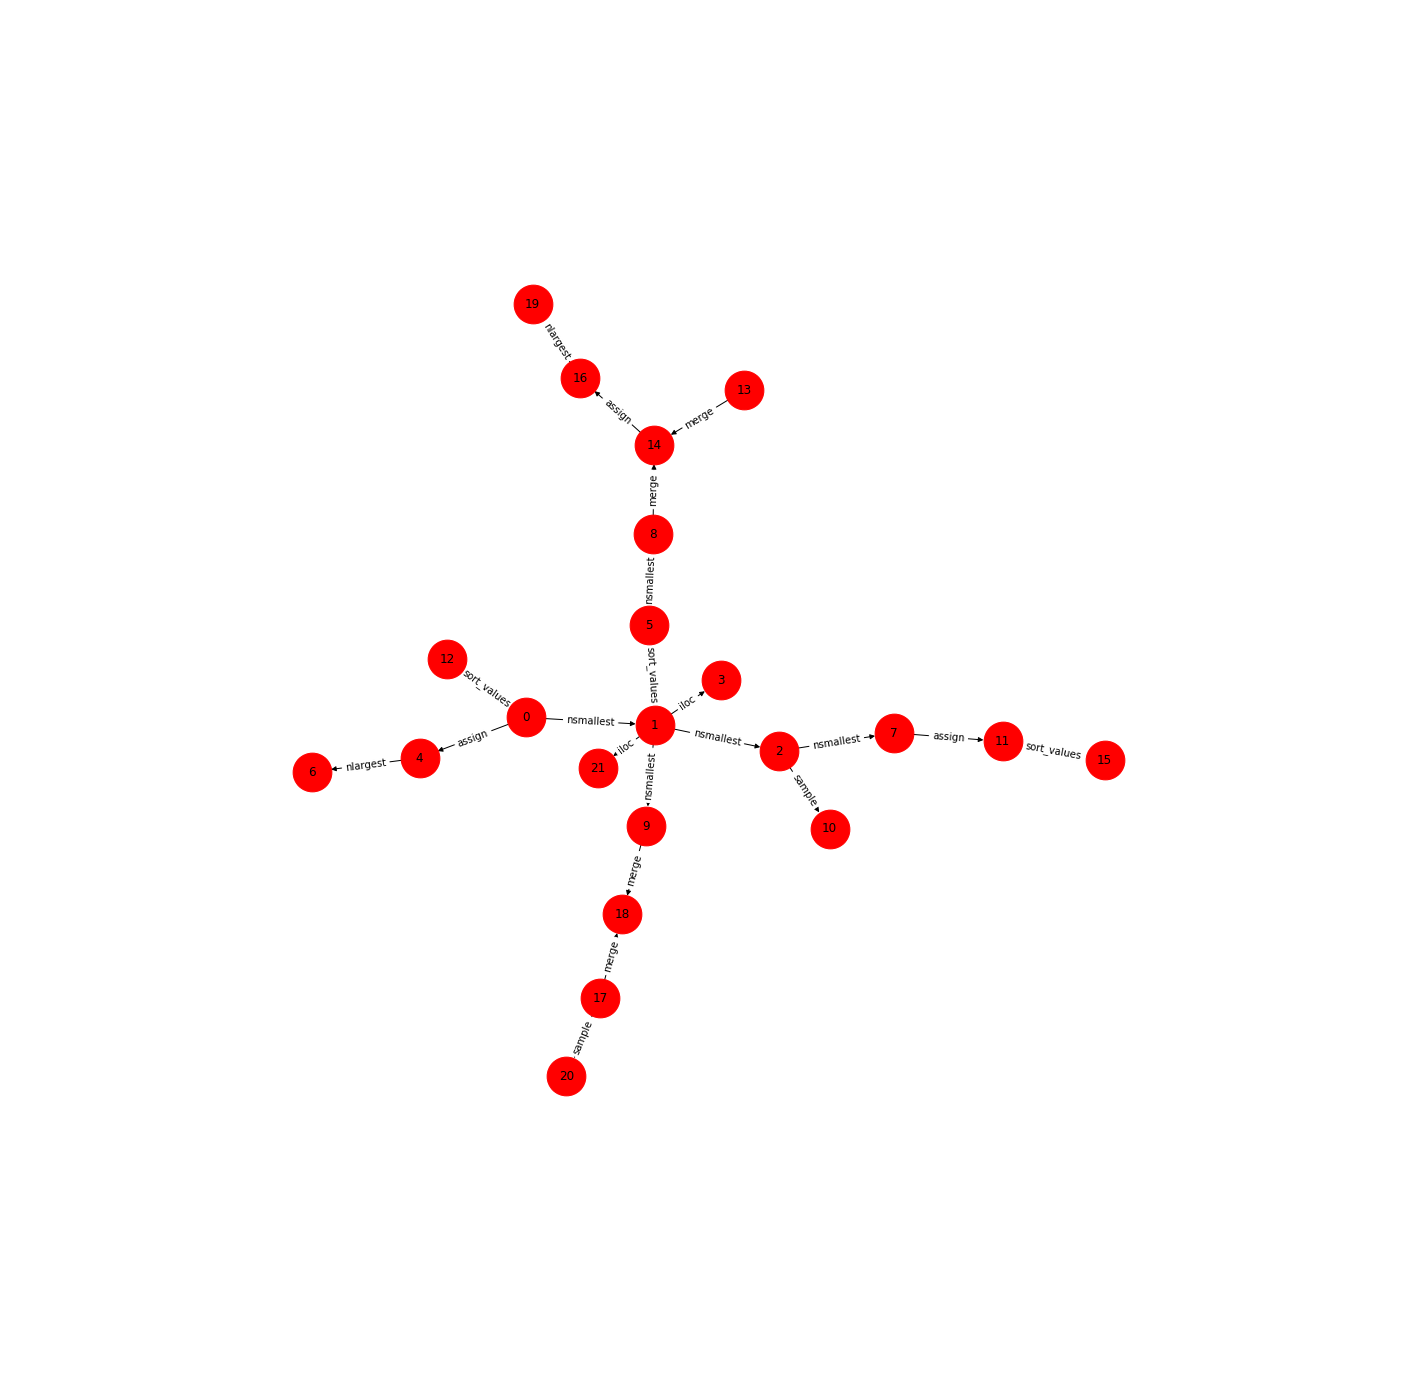

In [186]:
ds.lineage.draw_graph(canvas_size=(25,25))